<a href="https://colab.research.google.com/github/zaeyonz/Fish_distribution/blob/main/Fish_distribution_(pandas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Multiple regression (다중 회귀)***

*   여러개의 특성을 사용한 선형회귀를 **다중회귀** 라고 함
*   1개의 특성을 사용했을 땐 선형 회귀 모델이 학습하는것은 ***직선***
*   2개의 특성을 사용하면 선형 회귀 모델은 ***평면***을 학습
----


# **특성 공학**

*   기존의 특성을 사용하여 새로운 특성을 뽑아내는 작업을 특성공학 이라함
*   ex) 농어 길이 * 농어 높이 ---> 새로운 특성을 만듦

# ***Data 준비 (pandas)***

*   Pandas는 유명한 데이터 분석 라이브러리
*   Dataframe은 pandas의 핵심 데이터 구조
*   Numpy 배열과 비슷하게 다차원 배열을 다룰 수 있지만 훨씬 더 많은 기능 제공
*   Dataframe은 Numpy 배열로 쉽게 변경 가능


----

# ***read_csv()***

*   Pandas Dataframe을 만들기 위해 많이 사용되는 파일은 CSV파일임
*   CSV파일은 콤마로 이루어져 있는 텍스트 파일임
*   ***read_csv() 함수에 주소를 넣으면 CSV파일을 읽을 수 있음***
*   read_csv() 함수로 Dataframe을 만든 다음 ***to_numpy()*** 메서드를 사용해 Numpy 배열로 변경


In [1]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
#train set와 target set로 나누기

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

# ***scikit-learn의 transformer(변환기)***

*   변환기 클래스는 모두 fit(), transform() 메서드를 제공함
*   PolynomialFeatures 클래스는 sklearn.preprocessing 패키지에 포함되어 있음

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

# 2와 3을 제곱한 4와 9가 추가 됨.
# 2와 3을 곱한 6이 추가됨
# 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수이므로, 1은 항상 추가 됨

[[1. 2. 3. 4. 6. 9.]]


---
*   fit() 메서드는 새롭게 만들 특성 조합을 찾음
*   transform() 메서드는 실제로 데이터를 변환함
*   변환기는 타깃 데이터 없이 입력 데이터를 변환함
*   PolinomialFeature 클래스는 기본적으로 ***각 특성을 제곱한 항, 특성끼리 곱한 항***을 추가함
---

In [5]:
poly = PolynomialFeatures(include_bias = False)     #include_bias = False로 지정하면 마지막 특성인 1이 사라짐
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [6]:
# train_input에 PolynomialFeature 적용
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)


(42, 9)


*   get_features_names_out() 메서드를 호출하면 만들어진 특성들이 어떤 입력의 조합으로 만들어졌는지 보여줌
*  **'x0'은 첫번재 특성, 'x0^2'는 첫번째 특성의 제곱, 'x0 x1'은 첫 번째 특성과 두 번째 특성의 곱을 나타냄**

In [7]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [8]:
#test set도 변환!
test_poly = poly.transform(test_input)

#print(train_poly.shape)

# ***Model train(Multiple Linear Regression)***
*   다중회귀 모델 훈련

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

#특성이 늘어나면 선형회귀의 능력은 매우 강함

0.9903183436982125


In [10]:
#test set에 대한 점수 확인

print(lr.score(test_poly, test_target))

0.9714559911594111


*   test set의 점수는 높아지지 않았지만 길이 특성만 사용했을 때 있던 과소적합 문제는 더 이상 나타나지 않음
---

# 특성을 더 많이 추가 한다면??

In [11]:
#degree 매개변수를 사용하여 필요한 고차항의 최대 차수 지정

poly = PolynomialFeatures(degree = 5, include_bias = False)  # 5제곱까지 추가
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [12]:
# 특성 개수를 늘린 새로운 train set에 대한 점수

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [13]:
# 특성 개수를 늘린 새로운 test set에 대한 점수

print(lr.score(test_poly, test_target))

-144.40579436844948


*   아주 큰 음수가 나옴!!
*   **train set에 대해선 거의 완벽하게 학습하지만 train set에 너무 과대적합되므로 test set에선 점수가 매우 낮음**
---

# ***Regularization (규제)***

*   머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말함
*   **즉 모델이 훈련세트에 과대적합되지 않도록 만드는 장치임**
*   선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일임

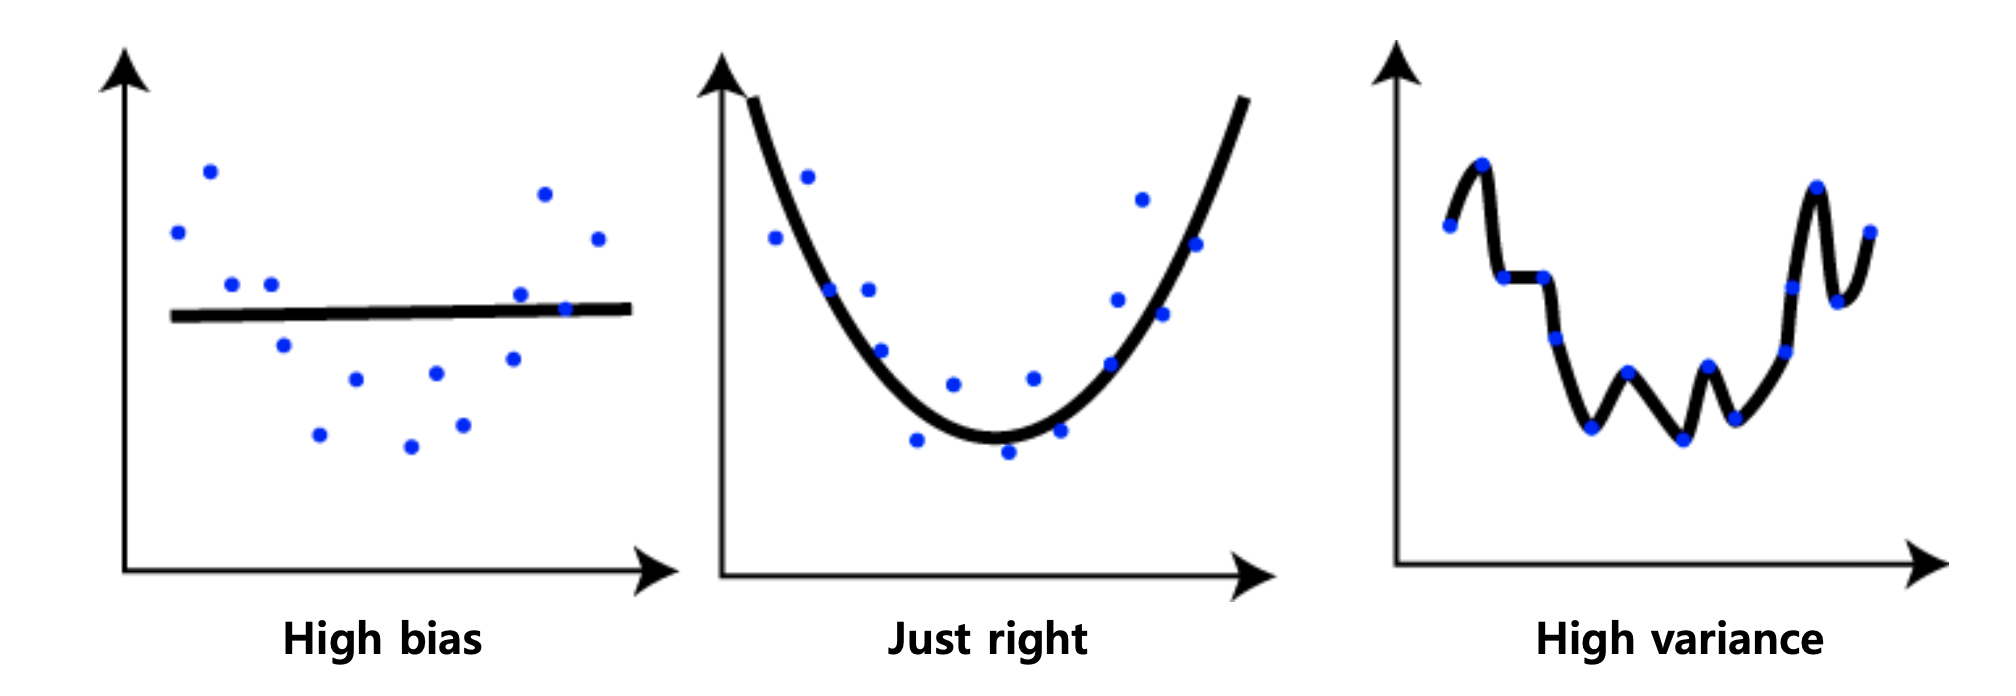

*   규제를 적용하기 전에 먼저 정규화를 적용시켜야함
*   이번엔 사이킷런에서 제공하는 StandardScaler 클래스를 사용 (이 클래스도 변환기의 하나임)

In [15]:
# StandardScaler 클래스의 객체 ss를 초기화 한 후 PolynomialFeature 클래스로 만든 train_poly를 사용해 이 객체를 훈련함

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()           # StandardScaler 클래스의 객체 ss를 초기화
ss.fit(train_poly)          # PolynomialFeature 클래스로 만든 train_poly를 사용해 ss 객체를 훈련함
train_scaled = ss.transform(train_poly)     # 정규화
test_scaled = ss.transform(test_poly)       # train set로 학습한 변환기를 사용하여 test set까지 변환하여야 함

# ***Ridge & Lasso (릿지와 라쏘)***

*   릿지는 ***계수를 제곱한 값을 기준으로 규제를 적용***
*   라쏘는  ***계수의 절댓값을 기준으로 기준을 적용***
*   일반적으로 릿지를 더 선호
*   두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수도 있음

# ***Ridge Regression(릿지 회귀)***

In [20]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


*  전에 train set의 완벽에 가까웠던 점수가 조금 낮아짐

In [21]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


*   test set의 점수가 정상으로 돌아왔음 (거대한 음수 --> 정상)
*   매우 많은 특성을 사용했음에도 불구하고 train set에 너무 과대적합되지 않아 test set에서도 좋은 성능을 내고 있음
----

# ***alpha value of Ridge & Rasso***

*   모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절함
*   ***alpha 값이 크면 규제 강도가 세지므로 계수값을 더 줄이고 과소적합되도록 유도함***
*   ***alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합 될 가능성이 커짐***
---
#    적절한 alpha 값을 찾는 한 가지 방법은 ***alpha 값에 대한 R²값의 그래프를 그리는 것!!***
*   train set와 test set의 점수가 가장 가까운 지점이 최적의 alpha 값이 됨

In [22]:
# 먼저 matplotlib를 import 하고 alpha 값을 바꿀 때마다 score() 메서드의 결과를 저장할 리스트를 만듦

import matplotlib.pyplot as plt

train_score = []
test_score = []

In [23]:
# alpha 값을 0.001에서 100까지 10배씩 늘려가며 Ridge Regression Model을 훈련한 다음 train set, test set의 점수를 파이썬 리스트에 저장

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # Ridge model 생성
    ridge = Ridge(alpha=alpha)
    # Ridge model 훈련
    ridge.fit(train_scaled, train_target)
    # train score와 test score를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

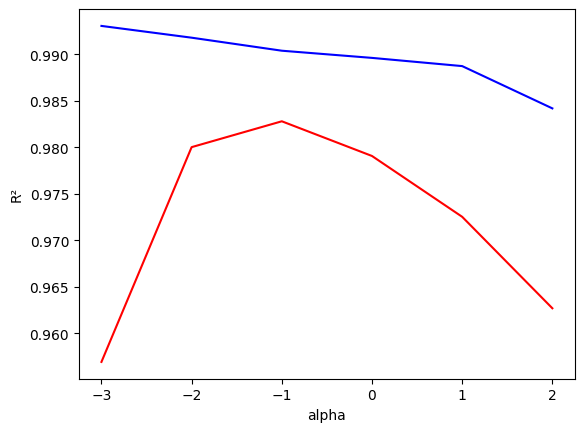

In [26]:
# 그래프 출력

plt.plot(np.log10(alpha_list), train_score, color = 'blue')         # alpha 값을 0.001부터 10배씩 늘렸기 때문에 그래프가 너무 촘촘히 그려질걸 대비하여 log를 씌움 --> 0.001은 -3, 0.01은 -2
plt.plot(np.log10(alpha_list), test_score, color = 'red')
plt.xlabel('alpha')
plt.ylabel('R²')
plt.show()

*   ***train set와 test set의 점수 차이가 아주 큼***
*   ***train set에는 잘 맞고 test set에는 형편없는 과대적합의 전형적인 모습임***
*   ***반대로 오른쪽 편은 train set와 test set의 점수가 모두 낮아지는 과소적합으로 가는 모습을 보임!***

# 적절한 alpha 값은 두 그래프가 가장 가깝고 test ste의 점수가 가장 높은 -1,
# 즉 10^-1 = 0.1임


In [27]:
# alpha 값을 0.1로 하여 최종 모델 훈련

ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


*   train set와 test set의 점수 모두 비슷하게 높고 과대,과소적합 사이에서 균형을 맞추고 있음
------